In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 60
pd.options.display.max_rows = 500
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import datetime as dt

## Canasta basica regional a precios constantes

### Indice de precios

In [2]:
## Correr la notebook 00 - deflator index

In [3]:
# # col_mon = [u'P21', u'P47T', u'PP08D1', u'TOT_P12', u'T_VI', u'V12_M', u'V2_M', u'V3_M', u'V5_M']

# cpi = pd.read_csv('./../data/info/indice_precios_M.csv', index_col=0)
# cpi.index = pd.to_datetime(cpi.index)
# cpi = cpi.loc['2000':]

# cpi.columns = pd.MultiIndex.from_product([['Indice de Precios'], cpi.columns])


### Valores de las canastas regionales, basica y total

In [4]:
timeindex = pd.date_range(start = dt.datetime(2016,4,1), end = dt.datetime(2019,6,30), freq='M')
timeindex = timeindex - pd.to_timedelta(timeindex.day - 15, unit='d') #- pd.DateOffset(months=1)


CBAr = pd.read_csv('./../data/info/CBA_regional.csv')
CBAr.index = timeindex
CBAr = CBAr.drop(['Ano4', 'Mes', 'TRIMESTRE'], axis = 1)

CBTr = pd.read_csv('./../data/info/CBT_regional.csv')
CBTr.index = timeindex
CBTr = CBTr.drop(['Ano4', 'Mes', 'TRIMESTRE'], axis = 1)

#.stack().reset_index()
CB = pd.concat([CBAr.stack(), CBTr.stack()], axis = 1)
CB.columns = ['CBA', 'CBT']; CB.index.names = ['Mes', 'Region']

In [5]:
# # 11747 (oct-nov 2019) se tiene que convertir en 
# 11747*(2283/1906) #para junio 2019
# # 11747*(1.231485) #para 2019Q2

In [10]:
cpi_M = pd.read_csv('./../data/info/indice_precios_M.csv', index_col=0)
# cpi_M = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_M.csv', index_col=0)

cpi_M.index = pd.to_datetime(cpi_M.index)

cpi_M_CB = cpi_M.loc[CB.unstack().index]
# cpi_M_CB = cpi_M.loc['2003':]
cpi_M_CB.columns = pd.MultiIndex.from_product([['Indice de Precios'], cpi_M_CB.columns])
# cpi_M_CB
# cpi_M_CB.columns = pd.MultiIndex([('A', 'B')])
# cpi_M_CB
# display(cpi_M.tail(10))
# cpi_mes_actual = cpi_M.iloc[-1][0]

In [ ]:
# cpi_mes_actual

In [11]:
## Fijarse que los archivos actualizados pueden estar en la carpeta del encuestador de hogares.
# cpi_d = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
cpi_d = pd.read_csv('./../data/info/indice_precios_d.csv', index_col=0)

display(cpi_d.tail())
cpi_2016 = cpi_d.loc['2016-01-01']
cpi_2016

,index
2021-11-11,4932.205266
2021-11-12,4938.182643
2021-11-13,4944.158856
2021-11-14,4950.133902
2021-11-15,4956.107784


index    661.924392
Name: 2016-01-01, dtype: float64

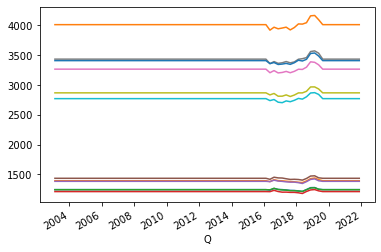

In [12]:
CB_i = pd.concat([CB.unstack(), cpi_M_CB], axis = 1)
# CB_i
CB_defl = CB_i.iloc[:, :-1].div(CB_i.iloc[:, -1], 0)*cpi_2016.values[0] # # divided by cpi index, multiplicado por nivel 2016
CB_defl = CB_defl.reindex(cpi_M.loc['2003':].index)


# # # Check how the fillna works...
# fig, ax = plt.subplots(1, figsize = (7, 5))
# CB_defl.fillna(CB_defl.mean()).plot(legend = False, ax = ax)
# # # CB_defl.fillna(CB_defl.quantile(.25)).head(25).plot(legend = False, ax = ax, c = '.5')
# # # CB_defl.fillna(CB_defl.quantile(.75)).head(25).plot(legend = False, ax = ax, c = '.5')

CB_defl = CB_defl.fillna(CB_defl.mean()).stack()

# CB_defl
CB_defl_Q = CB_defl.groupby([pd.Grouper(level = 0,freq = 'Q'), pd.Grouper(level = 1)]).mean()
CB_defl_Q.index.names = ['Q', 'Region']

CB_defl_Q = CB_defl_Q.unstack()
CB_defl_Q.index = CB_defl_Q.index - pd.to_timedelta(CB_defl_Q.index.day - 15, unit='d') - pd.DateOffset(months=1)

CB_defl_Q.plot(legend = False)

CB_defl_Q = CB_defl_Q.stack().reset_index()
CB_defl_Q.to_csv('./../data/info/CB_Reg_defl.csv', index = False)
# # precios de 2016-1-1

## Listo

In [13]:
# # Debug deflacion
# frac = 0.02
# val_list = []
# for q in ['2020-06-30', '2020-03-31']:
#     df = pd.read_csv('./../data/yr_samples/RFReg_'+str(frac)+'ARG'+q+'.csv', 
#                      usecols = ['P47T'], nrows = 50000)
#     val_list += [df.median().values[0]]
# plt.plot(np.array(val_list))

In [14]:
CB_defl_Q.tail()

,Q,Region,CBA,CBT
451,2021-11-15,Gran Buenos Aires,1393.603768,3434.563771
452,2021-11-15,Noreste,1242.750926,2868.646354
453,2021-11-15,Noroeste,1211.277458,2771.498969
454,2021-11-15,Pampeana,1383.640398,3409.551398
455,2021-11-15,Patagónica,1434.614021,4013.400820
